In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('weather_classification_data.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Get a summary of the dataset
print("\nSummary of the dataset:")
print(df.describe(include='all'))

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


First few rows of the dataset:
   Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4     

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Separate numerical and categorical columns
numerical_columns = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']
categorical_columns = ['Cloud Cover', 'Season', 'Location', 'Weather Type']

# Handle outliers in numerical columns using IQR
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
df = df.loc[~((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Encode categorical variables
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df.loc[:, column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Separate features and target variable
X = df.drop('Weather Type', axis=1)
y = df['Weather Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train.loc[:, numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test.loc[:, numerical_columns] = scaler.transform(X_test[numerical_columns])




In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Verify the type and values of y_train
print("y_train type:", type(y_train))
print("y_train unique values:", y_train.unique())

# Ensure y_train and y_test are integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



y_train type: <class 'pandas.core.series.Series'>
y_train unique values: [1 3 0 2]

Confusion Matrix:
[[602  10   1   2]
 [ 17 536   0   1]
 [ 10   1 559   1]
 [  6   1   1 590]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       615
           1       0.98      0.97      0.97       554
           2       1.00      0.98      0.99       571
           3       0.99      0.99      0.99       598

    accuracy                           0.98      2338
   macro avg       0.98      0.98      0.98      2338
weighted avg       0.98      0.98      0.98      2338



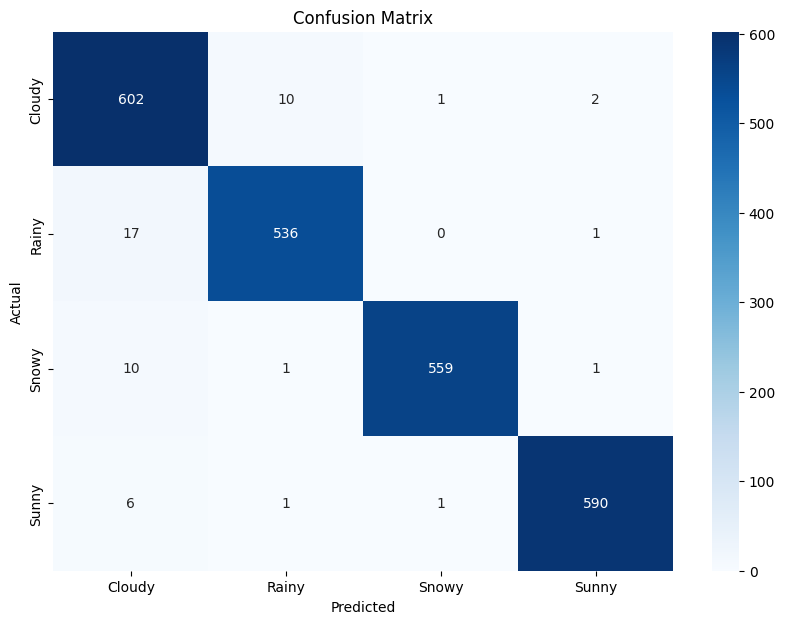

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menghitung matriks kebingungan
cm = confusion_matrix(y_test, y_pred)

# Membuat plot
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['Weather Type'].classes_, yticklabels=label_encoders['Weather Type'].classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
